# Communual Bike Sharing Data

There are 17380 rows witihin this file. Reach row representing thje number of bike rentals for a single hour of a single day. Information can be downloaded @ [Link to data](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

#Use 538 style
plt.style.use('fivethirtyeight')

%matplotlib inline
bike_rentals = pd.read_csv("bike_rental_hour.csv")

In [20]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Data does not required to be cleaned. Seems like no missing fields are there. Might need to change dteday column to datetime object. Need to explore use of the field.

In [21]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
bike_rentals.shape

(17379, 17)

In [23]:
rows_empty_bitches = bike_rentals.isnull().sum()

In [24]:
rows_empty_bitches

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

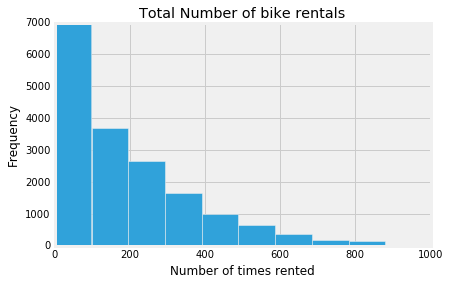

In [25]:
bike_rentals['cnt'].plot(kind='hist',title='Total Number of bike rentals')
plt.xlabel("Number of times rented")

In [26]:
abs(bike_rentals.corr()['cnt']).sort_values(ascending=True)

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [27]:
def assign_label(hour):
    if hour in range(6,13):
        return 1
    elif hour in range(12,19):
        return 2
    elif hour in range(18,25):
        return 3
    else:
        return 4

bike_rentals['time_label'] = bike_rentals['hr'].apply(lambda hour: assign_label(hour))

In [28]:
bike_rentals['time_label'].value_counts(normalize=True)*100

1    29.276713
2    25.174061
4    24.604408
3    20.944818
Name: time_label, dtype: float64

Before we embark on employing a Random Forest Classifier Model. We should decide on the evaluation metrics to benchmark our model. Since this is a regressor problem, will opt to use RMSE as a evaluation criteria.

# Employing Linear Regression on certain data sets.

In [46]:
#Training sample will be 80% of data set.
#Test sample will be remaing 20% of data set.
train_percentage = .8

train = bike_rentals.sample(frac=train_percentage)
test =  bike_rentals.loc[~bike_rentals.index.isin(train.index)]

#Don't include fields 'casual' and 'registered' as 'cnt' is derrived from them.
predictors = list(bike_rentals.columns)
predictors.remove('cnt')
predictors.remove('casual')
predictors.remove('dteday')
predictors.remove('registered')

train_target = train['cnt']
test_target = test['cnt']

model = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
model.fit(train[predictors],train['cnt'])
prediction = model.predict(test[predictors])
rmse_linr = np.mean((prediction - test['cnt'])** 2)
print(rmse_linr," with time label")

# #Don't include fields 'casual' and 'registered' as 'cnt' is derrived from them.
# #No time predictor
# predictors_wo_time = ['holiday','season','hum','atemp','yr','workingday']
# model = LinearRegression()
# model.fit(train[predictors_wo_time],train['cnt'])
# prediction = model.predict(test[predictors_wo_time])
# rmse_linr_time = np.sqrt(mean_squared_error(test['cnt'],prediction))
# print(rmse_linr_time," w/o time label")


17032.413044852285  with time label


# Employing Decision Tree Regression

In [51]:
#No min samples leafs
dtr = DecisionTreeRegressor()
#Fit Model
dtr.fit(train[predictors],train_target)
#Prediction base on tte
dtr_prediction = dtr.predict(test[predictors])
#rmse_dtr = np.sqrt(mean_squared_error(test_target,dtr_prediction))
np.mean((dtr_prediction - test["cnt"]) ** 2)

3178.3788837744532

In [49]:
#With min samples leafs = 5
dtr = DecisionTreeRegressor(min_samples_leaf=5)
#Fit Model
dtr.fit(train[predictors],train_target)
#Prediction base on tte
dtr_prediction = dtr.predict(test[predictors])
#rmse_dtr = np.sqrt(mean_squared_error(test_target,dtr_prediction))
np.mean((dtr_prediction - test["cnt"]) ** 2)

2451.7080788339927

Taking into account the non-linearity of features in the dataset. Decision Tree performs beter than Linear Regression. Resulting in higher accuracy.

# Random Forest Regression

In [53]:
#No min sample leaf
rfr = RandomForestRegressor()
#Fit RFR
rfr.fit(train[predictors],train_target)
#Predict on test data
prediction_rfr = rfr.predict(test[predictors])
rfr_mse = np.mean((prediction_rfr - test['cnt']) **2)

print(rfr_mse)

1892.6592002301497


In [55]:
#min sample leaf = 5 && n_estimators = 100,
rfr = RandomForestRegressor(min_samples_leaf = 5,n_estimators = 100)
#Fit RFR
rfr.fit(train[predictors],train_target)
#Predict on test data
prediction_rfr = rfr.predict(test[predictors])
rfr_mse = np.mean((prediction_rfr - test['cnt']) **2)

print(rfr_mse)

1865.7677036711182


Among the three ML algorithms employed and evaluated on MSE.It seems that random forest performed the best at 1865 MSE.



| Tables        | Linear Regression   | Decision Trees  | Random Forest |
| ------------- |:-------------:| -----:|
| MSE     | 17032.41 | 2451.70 | 1865.76

    

Could combine other features i.e temperature, humidity and wind. Context is important, location and season are factor that could also be considered.Targets that derrive 'cnt' such as 'casual' and 'registered' can be used instead.